In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator

# Exercise 1: Clustering Method

In this exercise we will explore how each clustering algorithm discussed in the class works.

## Load Dataset

The dataset that we will use is a customer transaction in a certain mall. In this dataset there will 4 features including Gender, Age, Annual Income, and Spending Score. You can get the dataset from https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/mall_customers.csv

In [46]:
# load dataset and show the first five sample
df = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [47]:
# rename the Annual Income (k$)	Spending Score (1-100) column
df.rename(columns={'Annual Income (k$)': 'Annual Income'}, inplace=True)
df.rename(columns={'Spending Score (1-100)': 'Spending Score'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [48]:
# describe data
df.describe()

,CustomerID,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [49]:
# Check for null values in the dataset
df.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income,0
Spending Score,0


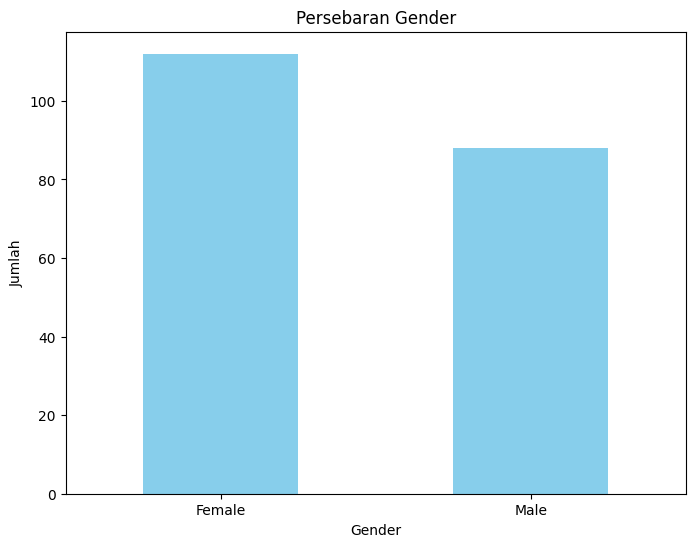

Berdasarkan dataset paling banyak gendernya female


In [50]:
# make an insightful visualization and explain
Gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(8,6))
Gender_counts.plot(kind='bar', color='skyblue')#Membuat barchart (isi datanya)
plt.title('Persebaran Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()
print("Berdasarkan dataset paling banyak gendernya female")

## Data Preprocessing

For this case study, we only use income and spending score

In [51]:
# create new dataframe that consist only annual income and spending score
df_filtered = df[['Annual Income', 'Spending Score']]

# Menampilkan hasil
df_filtered

,Annual Income,Spending Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [52]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assuming your DataFrame is named df and contains the columns "Annual Income" and "Spending Score"
scaler = MinMaxScaler()
df[['Annual Income', 'Spending Score']] = scaler.fit_transform(df[['Annual Income', 'Spending Score']])

# Display the scaled data
df[['Annual Income', 'Spending Score']].head()

,Annual Income,Spending Score
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Annual Income', 'Spending Score']] = scaler.fit_transform(df[['Annual Income', 'Spending Score']])

# Display the standardized data
df[['Annual Income', 'Spending Score']]

,Annual Income,Spending Score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


Before we analyze our data, we need to scale the data. You can use MinMaxScaler or StandardScaler.

In [54]:
df[['Annual Income', 'Spending Score']].describe()

,Annual Income,Spending Score
count,2.000000e+02,2.000000e+02
mean,-2.842171e-16,1.287859e-16
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


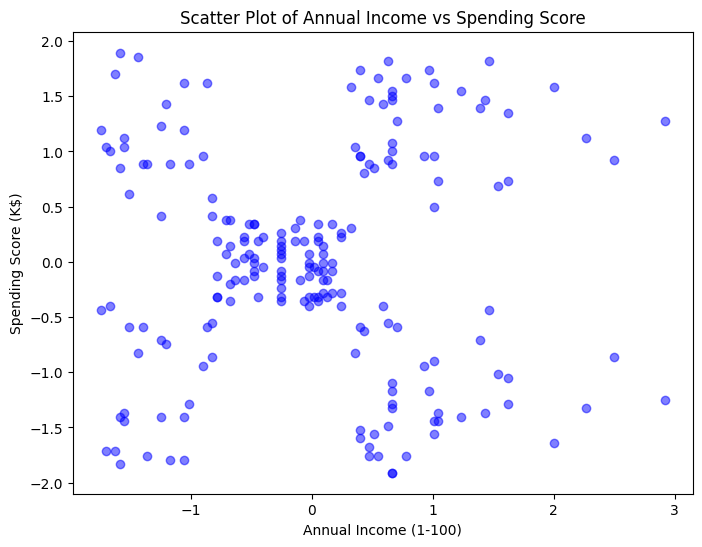

In [55]:
import matplotlib.pyplot as plt

# Scatter plot for Annual Income vs. Spending Score
plt.figure(figsize=(8, 6))
plt.scatter(df['Annual Income'], df['Spending Score'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Annual Income vs Spending Score')
plt.xlabel('Annual Income (1-100)')
plt.ylabel('Spending Score (K$)')
plt.show()

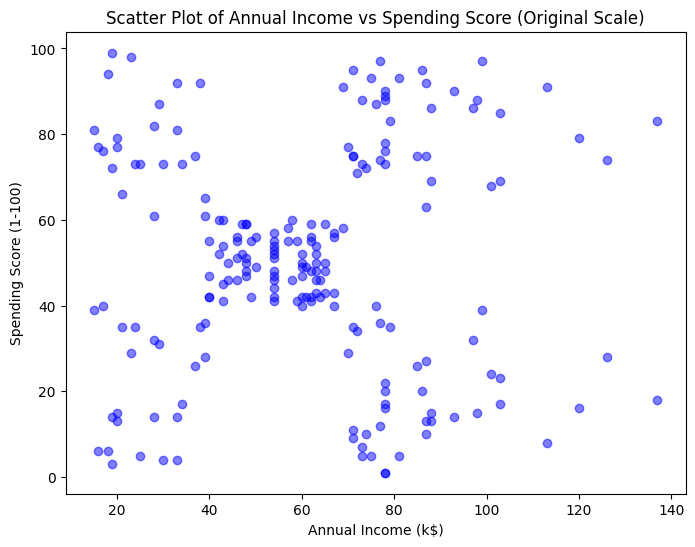

In [56]:
import matplotlib.pyplot as plt

# Scatter plot for Annual Income vs Spending Score on original scale
plt.figure(figsize=(8, 6))
plt.scatter(df_filtered['Annual Income'], df_filtered['Spending Score'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Annual Income vs Spending Score (Original Scale)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

## Clustering

The evaluation for chosing the number of K in KMEANS can be done by several methods such as elbow method.

1. using elbow method
In this case study, the below parameter settings is used:
- init: random
- range: (1,11)
- max_iter: 300
- random state: 42

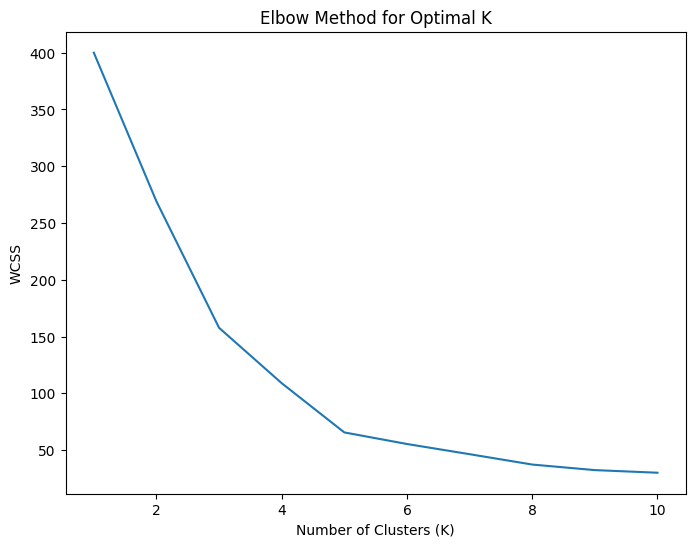

In [57]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define range for K
K_range = range(1, 11)
wcss = []

# Calculate WCSS for each value of K
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='random', max_iter=300, random_state=42)
    kmeans.fit(df[['Annual Income', 'Spending Score']])  # Use original or scaled data as needed
    wcss.append(kmeans.inertia_)

# Plot the WCSS values to visualize the elbow
plt.figure(figsize=(8, 6))
plt.plot(K_range, wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [58]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
import matplotlib.pyplot as plt

# Define range for K
K_range = range(1, 11)
wcss = []

# Calculate WCSS for each value of K
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='random', max_iter=300, random_state=42)
    kmeans.fit(df[['Annual Income', 'Spending Score']])  # Use original or scaled data as needed
    wcss.append(kmeans.inertia_)

# Use KneeLocator to find the elbow point
knee = KneeLocator(K_range, wcss, curve='convex', direction='decreasing')

# Plot the WCSS values and the detected elbow point


print(f"The best k for you model is: {knee.elbow}")

The best k for you model is: 5


### K-Means Algorithm

For using KMeans clustering algorithm, you need to define the number of cluster, initialization number, number of iteration, and random state.

In this case study, the below parameter settings is used:
- centroid initialization: random
- number of cluster: 5
- number of iteration: 300
- random state: 42

In [59]:
from sklearn.cluster import KMeans

# Define the KMeans model with specified parameters
kmeans = KMeans(n_clusters=5, init='random', max_iter=300, random_state=42)

# Fit the model to the data and predict clusters
# Here, we are using the 'Annual Income' and 'Spending Score' columns
y_pred = kmeans.fit_predict(df[['Annual Income', 'Spending Score']])

y_pred

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4,
       0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 3, 4, 3, 2, 3, 2, 3,
       4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

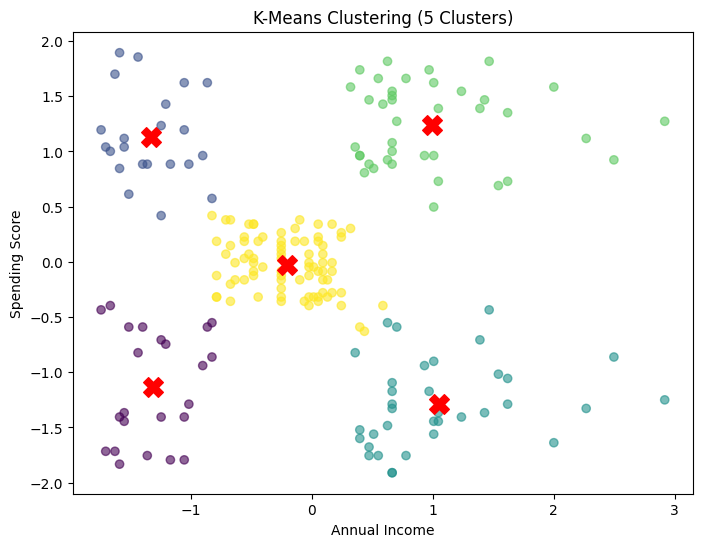

In [60]:
import matplotlib.pyplot as plt
df['Cluster'] = y_pred
# Scatter plot of clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['Annual Income'], df['Spending Score'], c=df['Cluster'], cmap='viridis', marker='o', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')  # Centroids
plt.title('K-Means Clustering (5 Clusters)')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

Visualize your result based on income and spending. You also can show the final position of the centroid.

In [61]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Assuming df_filtered is your original DataFrame containing the scaled data
# Example: df_filtered[['Annual Income', 'Spending Score']] are the columns to scale
scaler = MinMaxScaler()
scaled_df = df_filtered[['Annual Income', 'Spending Score']]  # Scale only the relevant columns
scaled_df = scaler.fit_transform(scaled_df)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, init='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(scaled_df)

# Inverse transform the scaled data to get the original values
original_data_with_clusters = pd.DataFrame(scaler.inverse_transform(scaled_df), columns=['AnnualIncome', 'SpendingScore'])
original_data_with_clusters.head()


,AnnualIncome,SpendingScore
0,15.0,39.0
1,15.0,81.0
2,16.0,6.0
3,16.0,77.0
4,17.0,40.0


In [67]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Assuming df_filtered is your original DataFrame containing the scaled data
# Example: df_filtered[['Annual Income', 'Spending Score']] are the columns to scale
scaler = MinMaxScaler()
scaled_df = df_filtered[['Annual Income', 'Spending Score']]  # Scale only the relevant columns
scaled_df = scaler.fit_transform(scaled_df)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, init='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(scaled_df)

# Inverse transform the scaled data to get the original values
original_data_with_clusters = pd.DataFrame(scaler.inverse_transform(scaled_df), columns=['AnnualIncome', 'SpendingScore'])

# Add the cluster column from y_pred
original_data_with_clusters['Cluster'] = y_pred

# Display the original data with cluster labels


# Now you can group by 'Cluster' and get the summary statistics
cluster_summary = original_data_with_clusters.groupby('Cluster').agg(
    {'SpendingScore': ['mean', 'std', 'min', 'max'],
     'AnnualIncome': ['mean', 'std', 'min', 'max']}
)

# Display the cluster summary
cluster_summary.head()

SpendingScore                        AnnualIncome                   \
                 mean        std   min   max         mean        std   min   
Cluster                                                                      
0           82.128205   9.364489  63.0  97.0    86.538462  16.312485  69.0   
1           20.913043  13.017167   3.0  40.0    26.304348   7.893811  15.0   
2           79.363636  10.504174  61.0  99.0    25.727273   7.566731  15.0   
3           17.114286   9.952154   1.0  39.0    88.200000  16.399067  70.0   
4           49.518519   6.530909  34.0  61.0    55.296296   8.988109  39.0   

                
           max  
Cluster         
0        137.0  
1         39.0  
2         39.0  
3        137.0  
4         76.0

Cluster 0:
Characteristics: Customers with low annual income and low spending scores, likely to be budget-conscious and infrequent buyers.
Suggestions: Provide promotions, discounts, and affordable product options to motivate these customers to make purchases. Consider offering bundled deals to increase the perceived value.

Cluster 1:
Characteristics: Customers with low income but high spending scores, indicating they are willing to allocate a larger portion of their income for specific items or brands.
Suggestions: Introduce payment plans, credit options, or loyalty programs to cater to these high-spending customers, offering them special deals and discounts.

Cluster 2:
Characteristics: Customers who may be more cautious with their spending, possibly prioritizing savings.
Suggestions: Raise awareness about the value of your products or services and engage them with personalized marketing that highlights the benefits and long-term savings.

Cluster 3:
Characteristics: Affluent customers with high annual income and spending scores, indicating a preference for premium products and services.
Suggestions: Offer exclusive, high-end experiences, personalized services, and partnerships with luxury brands to attract and retain these customers.

Cluster 4:
Characteristics: Customers with moderate income and spending scores, likely to seek a balance between quality and affordability.
Suggestions: Focus on providing value-for-money offerings, with a wide range of quality products and services to meet various needs and preferences.

<write here>